DATA PREPROCESSING

In [205]:
import pandas as pd 
data = pd.read_csv('cars.csv')
data.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,NaN,50000.0,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019.0,40000.0,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017.0,20000.0,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020.0,30000.0,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016.0,60000.0,Diesel,Automatic,Second,18,1999,194,5,850000


Öncelikle Car_ID sütunu bizim için anlamlı veriler içermediği için bu sütunu sileceğiz.

In [206]:
data.drop(columns='Car_ID', inplace=True)
data.head()

,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Toyota,Corolla,NaN,50000.0,Petrol,Manual,First,15,1498,108,5,800000
1,Honda,Civic,2019.0,40000.0,Petrol,Automatic,Second,17,1597,140,5,1000000
2,Ford,Mustang,2017.0,20000.0,Petrol,Automatic,First,10,4951,395,4,2500000
3,Maruti,Swift,2020.0,30000.0,Diesel,Manual,Third,23,1248,74,5,600000
4,Hyundai,Sonata,2016.0,60000.0,Diesel,Automatic,Second,18,1999,194,5,850000


Filling Missing Values (Eksik Değerlerin Doldurulması)

In [207]:
data.isnull().sum()

Brand                0
Model                0
Year                 2
Kilometers_Driven    2
Fuel_Type            0
Transmission         2
Owner_Type           6
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

İlk olarak 'Year' sütunundaki verilerin dağılımının simetrik ya da asimetrik olduğuna karar vermek için density ve histogram grafiği çizdireceğiz ve verilerin çarpıklığına (skewness) bakacağız.

<Axes: ylabel='Density'>

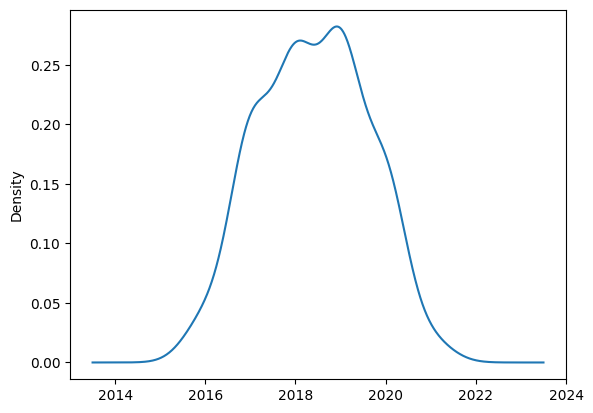

In [208]:
import matplotlib.pyplot as plt
data['Year'].plot(kind='density')

<Axes: >

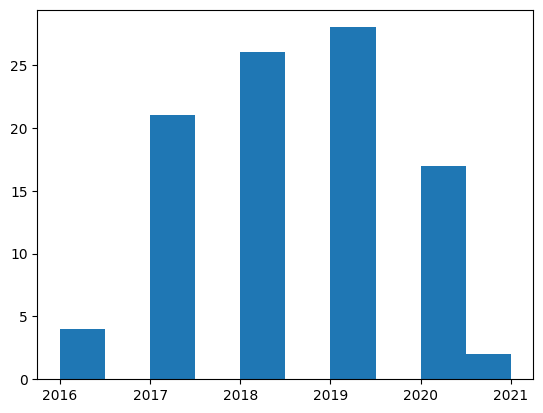

In [209]:
data['Year'].hist(grid=False)

In [210]:
from scipy.stats import skew

year_skewness = skew(data['Year'].dropna())
year_skewness

np.float64(-0.018346851043460274)

İki grafikten ve çarpıklıktan da görüldüğü üzere veriler simetrik dağılıma yakın olduğu için eksik değerleri medyan veya ortalama ile doldurabiliriz fakat yıl verisi sürekli bir veri olmadığı için (örneğin yıl verisi 2015.7 olamaz) medyan ile doldurmak daha mantıklı olacaktır.

In [211]:
data['Year'] = data['Year'].fillna(data['Year'].median())
data['Year'].isnull().sum()

np.int64(0)

İkinci olarak 'Kilometers_Driven' sütununu inceleyeceğiz.

<Axes: ylabel='Density'>

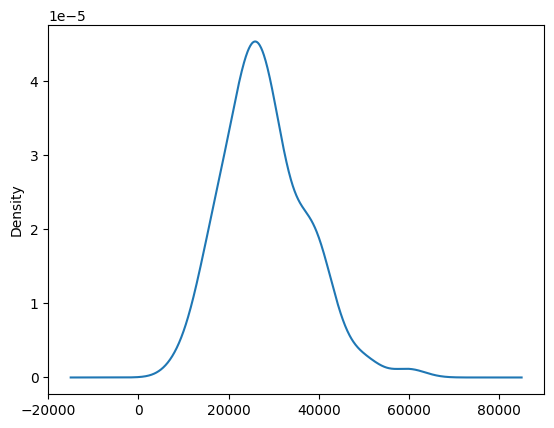

In [212]:
data['Kilometers_Driven'].plot(kind='density')

<Axes: >

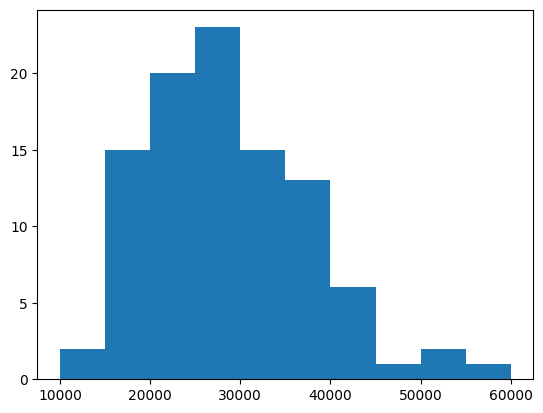

In [213]:
data['Kilometers_Driven'].hist(grid=False)

In [214]:
kmdriven_skewness = skew(data['Kilometers_Driven'].dropna())
kmdriven_skewness

np.float64(0.6385366899841554)

İki grafikten ve çarpıklıktan da görüldüğü üzere veriler simetrik dağılıma uzak olduğu için eksik değerleri medyan ile doldurmamız en doğru seçecek olacaktır.

In [215]:
data['Kilometers_Driven'] = data['Kilometers_Driven'].fillna(data['Kilometers_Driven'].median())
data['Kilometers_Driven'].isnull().sum()

np.int64(0)

Şimdi kategorik veriler için bar grafiği analizi yapacağız.

<BarContainer object of 2 artists>

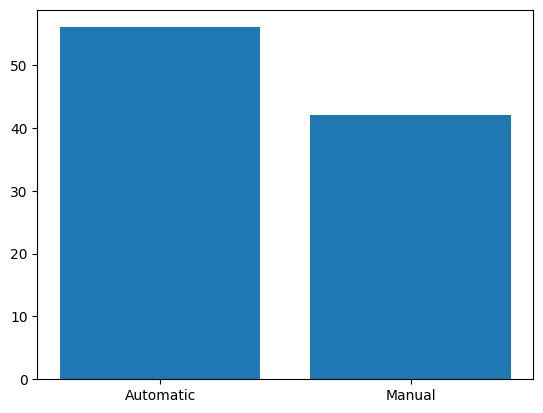

In [216]:
transmission_values = data['Transmission'].value_counts()
transmission_names = data['Transmission'].value_counts().index.tolist()

plt.bar(x=transmission_names, height=transmission_values)

Transmission verisi kategorik bir veri olduğu için eksik verileri en çok tekrar eden değer (mode) ile doldurmak en doğru seçenek olacaktır.

In [217]:
data['Transmission'] = data['Transmission'].fillna(data['Transmission'].mode()[0])
data['Transmission'].isnull().sum()

np.int64(0)

<BarContainer object of 3 artists>

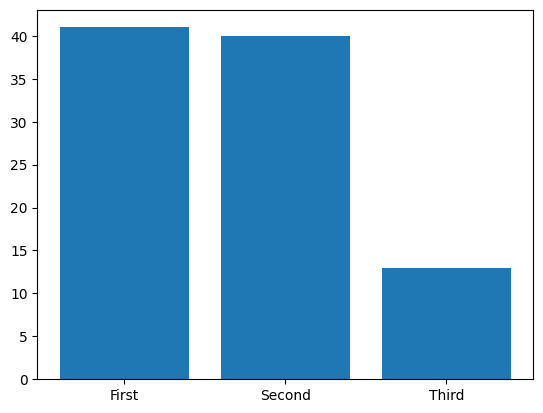

In [218]:
owner_type_values = data['Owner_Type'].value_counts()
owner_type_names = data['Owner_Type'].value_counts().index.tolist()
plt.bar(x=owner_type_names, height= owner_type_values)

Aynı şekilde Owner_Type verisi de kategorik olduğu için eksik verileri en çok tekrar eden değer ile dolduracağız.

In [219]:
data['Owner_Type'] = data['Owner_Type'].fillna(data['Owner_Type'].mode()[0])
data.isnull().sum()

Brand                0
Model                0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

ENCODING

Öncelikle, encoding işlemi için dataframe'deki veri tipi object olan sütunları ve bu sütunların kaç farklı değer içerdiğini bulmamız gerek.

In [220]:
object_columns = data.select_dtypes(include=['object']).columns

for col in object_columns:
    print(col,data[col].nunique())

Brand 11
Model 58
Fuel_Type 2
Transmission 2
Owner_Type 3


2 farklı değer içeren sütunlar için label encoder, 3 farklı değer içeren sütunlar için one hot encoder kullanacağız.

In [221]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

for col in object_columns:

    if data[col].nunique() == 2:
        label_encoder = LabelEncoder()
        data[col] = label_encoder.fit_transform(data[col].values)

data.head()

,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Toyota,Corolla,2018.0,50000.0,1,1,First,15,1498,108,5,800000
1,Honda,Civic,2019.0,40000.0,1,0,Second,17,1597,140,5,1000000
2,Ford,Mustang,2017.0,20000.0,1,0,First,10,4951,395,4,2500000
3,Maruti,Swift,2020.0,30000.0,0,1,Third,23,1248,74,5,600000
4,Hyundai,Sonata,2016.0,60000.0,0,0,Second,18,1999,194,5,850000


In [222]:
onehot_encoder = OneHotEncoder(drop='first')

owner_type_encoded = onehot_encoder.fit_transform(data['Owner_Type'].values.reshape(-1,1)).toarray()
owner_type_encoded = pd.DataFrame(data=owner_type_encoded, columns=['Second', 'Third'])

data.drop(columns=['Owner_Type'], inplace=True)
data = pd.concat([owner_type_encoded, data], axis=1)
data.head()

,Second,Third,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Mileage,Engine,Power,Seats,Price
0,0.0,0.0,Toyota,Corolla,2018.0,50000.0,1,1,15,1498,108,5,800000
1,1.0,0.0,Honda,Civic,2019.0,40000.0,1,0,17,1597,140,5,1000000
2,0.0,0.0,Ford,Mustang,2017.0,20000.0,1,0,10,4951,395,4,2500000
3,0.0,1.0,Maruti,Swift,2020.0,30000.0,0,1,23,1248,74,5,600000
4,1.0,0.0,Hyundai,Sonata,2016.0,60000.0,0,0,18,1999,194,5,850000


CATEGORIZATION

Üçten fazla farklı değer içeren sütunlar için kategorizasyon işlemi uygulayacağız. Nesne veri tipindeki sütunları ortalama fiyatların genel medyanına göre ikili (1 veya 0) kategorilere dönüştürerek, eski sütunları kaldırıp yeni bir sınıflandırma sütunu oluşturacağız.

In [223]:
object_cols = data.select_dtypes(include=['object']).columns

for col in object_cols:
    mean_prices = data.groupby(col)['Price'].mean()
    overall_median = mean_prices.median()
    data['Categorized ' + col] =  data[col].map(lambda col: 1 if mean_prices[col] > overall_median else 0)
    data.drop(columns=[col], inplace=True)
    
data.head()

,Second,Third,Year,Kilometers_Driven,Fuel_Type,Transmission,Mileage,Engine,Power,Seats,Price,Categorized Brand,Categorized Model
0,0.0,0.0,2018.0,50000.0,1,1,15,1498,108,5,800000,1,0
1,1.0,0.0,2019.0,40000.0,1,0,17,1597,140,5,1000000,0,0
2,0.0,0.0,2017.0,20000.0,1,0,10,4951,395,4,2500000,1,1
3,0.0,1.0,2020.0,30000.0,0,1,23,1248,74,5,600000,0,0
4,1.0,0.0,2016.0,60000.0,0,0,18,1999,194,5,850000,0,0


DETECTING OUTLIERS (AYKIRI DEĞER TESPİTİ)

IQR metodunu sağlıklı bi şekilde uygulayabilmek için öncelikle sürekli veriler içeren sütunları belirleyeceğiz ve aykırı değerleri sileceğiz.

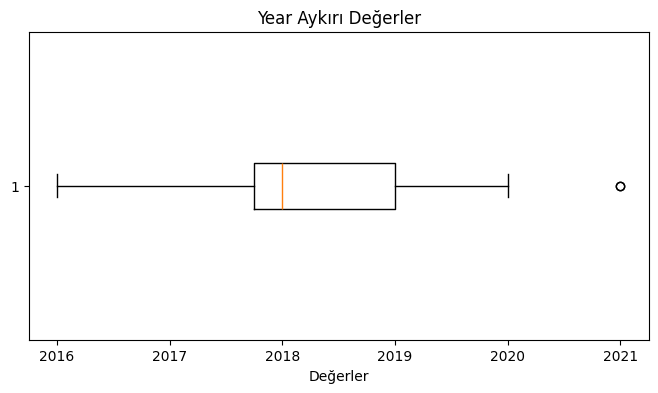

Year için Aykırı Değer Sayısı: 2


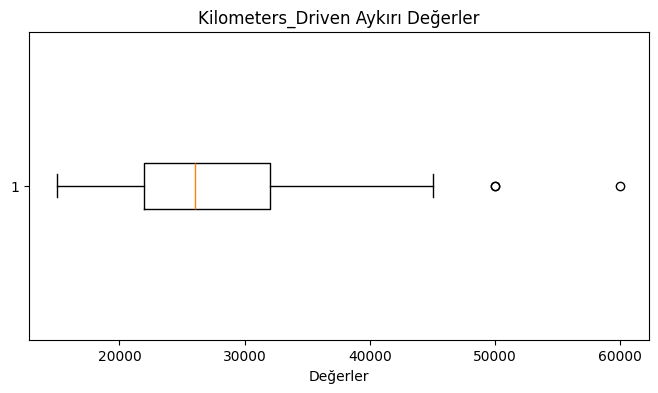

Kilometers_Driven için Aykırı Değer Sayısı: 3


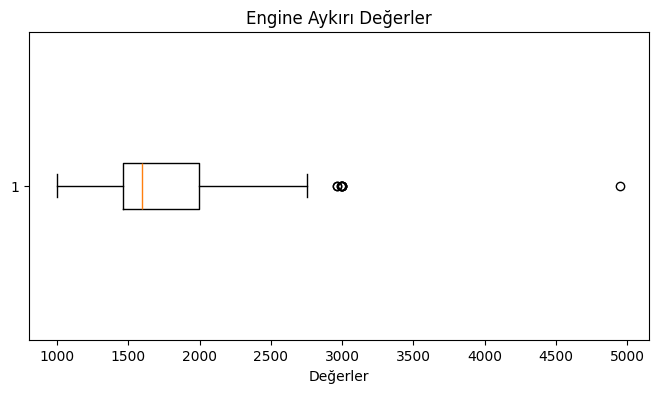

Engine için Aykırı Değer Sayısı: 9


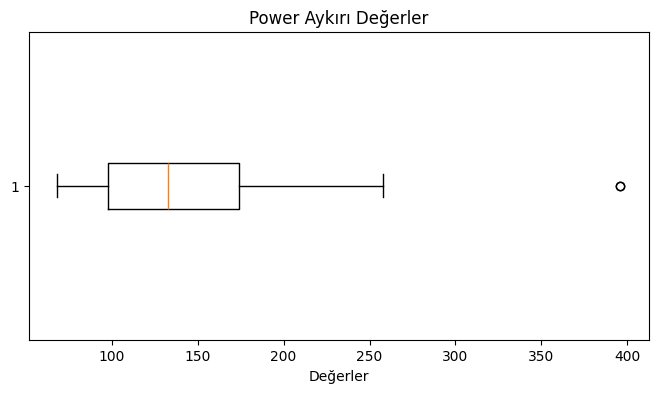

Power için Aykırı Değer Sayısı: 2
Filtrelenmiş Veri Seti Boyutu: (84, 13)


In [224]:
continuous_columns = []

for col in data.columns:
    if data[col].nunique() > 3:
        continuous_columns.append(col)

for col in continuous_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    outlier_count = outliers.shape[0]
    
    if outlier_count > 0:
        plt.figure(figsize=(8, 4))
        plt.boxplot(data[col], vert=False)
        plt.title(f'{col} Aykırı Değerler')
        plt.xlabel('Değerler')
        plt.show()

        print(f'{col} için Aykırı Değer Sayısı: {outlier_count}')
    
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

print("Filtrelenmiş Veri Seti Boyutu:", data.shape)

Dataframe'in ilk şekli ve son şekli arasındaki farka bakacak olursak toplam 16 adet satırın aykırı değer içerdiği için silindiğini görebiliriz. Bu aşama ile birlikte aykırı değer tespitinin sonuna geldik.

FEATURE SELECTION (ÖZNİTELİK SEÇİMİ)

Dataframe'deki önemli olabileceğini düşündüğümüz verileri seçmek için iki farklı metot kullanacağız. Sürekli değişkenler için korelasyon ile kategorik değişkenler için pvalue ile öznitelik seçimi yapacağız.

İlk olarak sürekli değişkenlerin hedef değişken ile olan korelasyonunu anlayabilmek için korelasyon tablosunu inceleyelim. Burada anlamlı öznitelikler için en yaygın kullanılan 0.5 korelasyon değerini kullacağız.

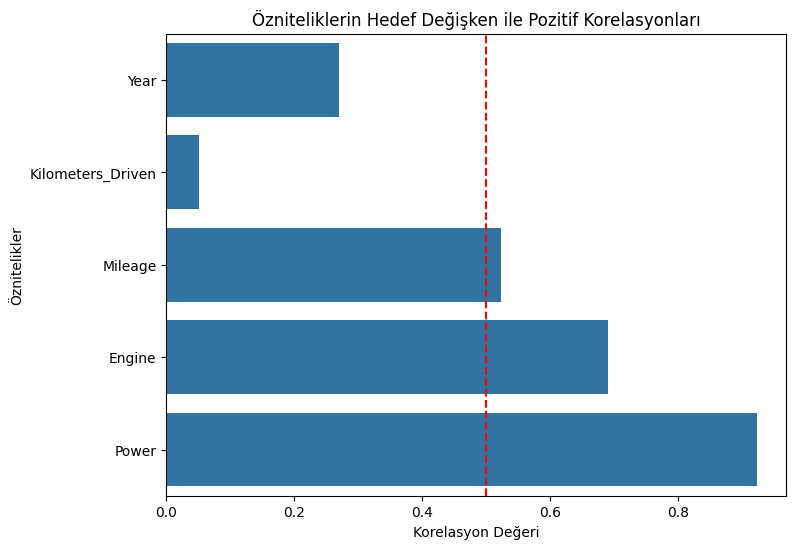

Seçilen Öznitelikler:  ['Mileage', 'Engine', 'Power']
Silinecek Özellikler:  ['Year', 'Kilometers_Driven']


In [225]:
import seaborn as sns

cont_cols_df = pd.DataFrame(data=data[continuous_columns], columns=continuous_columns)

corrs = abs(cont_cols_df.corr()['Price'].drop('Price'))

correlation_df = corrs.reset_index()
correlation_df.columns = ['Feature', 'Correlation with Target']

plt.figure(figsize=(8, 6))
sns.barplot(x='Correlation with Target', y='Feature', data=correlation_df)
plt.title('Özniteliklerin Hedef Değişken ile Pozitif Korelasyonları')
plt.xlabel('Korelasyon Değeri')
plt.axvline(x=0.5, color='red', linestyle='--', label='Dikey Çizgi (x=0.5)')
plt.ylabel('Öznitelikler')
plt.show()

selected_features = corrs[abs(corrs) >= 0.5].index.tolist()
features_to_delete = corrs[abs(corrs) < 0.5].index.tolist()

print("Seçilen Öznitelikler: ", selected_features)
print("Silinecek Özellikler: ", features_to_delete)

Şimdi korelasyonu 0.5'ten küçük olanları dataframe'den silelim.

In [226]:
data.drop(columns=features_to_delete, inplace=True)
data.head()

,Second,Third,Fuel_Type,Transmission,Mileage,Engine,Power,Seats,Price,Categorized Brand,Categorized Model
1,1.0,0.0,1,0,17,1597,140,5,1000000,0,0
3,0.0,1.0,0,1,23,1248,74,5,600000,0,0
5,0.0,0.0,1,1,17,1198,108,5,750000,0,0
6,1.0,0.0,0,0,15,2179,140,7,900000,0,0
7,0.0,0.0,1,0,18,999,76,5,650000,0,0


Şimdi kategorik özellikler için ANOVA testini uygulayacağız ve yine en yaygın eşik değerlerden biri olan 0.05'i kullanacağız.

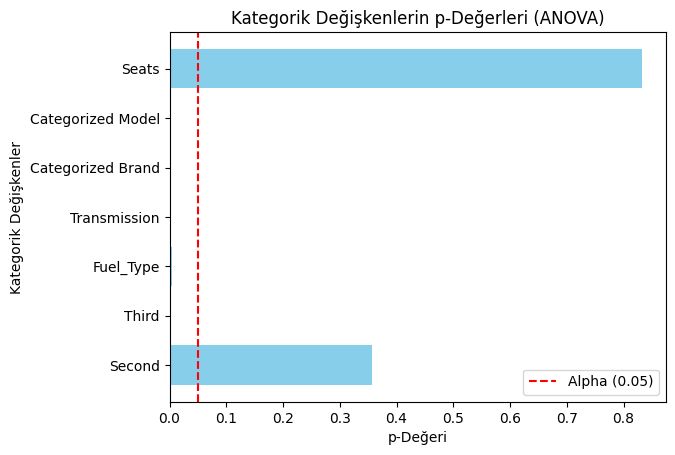


Seçilen Kategorik Özellikler: ['Third', 'Fuel_Type', 'Transmission', 'Categorized Brand', 'Categorized Model']


,Third,Fuel_Type,Transmission,Mileage,Engine,Power,Price,Categorized Brand,Categorized Model
1,0.0,1,0,17,1597,140,1000000,0,0
3,1.0,0,1,23,1248,74,600000,0,0
5,0.0,1,1,17,1198,108,750000,0,0
6,0.0,0,0,15,2179,140,900000,0,0
7,0.0,1,0,18,999,76,650000,0,0


In [227]:
from scipy.stats import f_oneway

categorical_data = ['Second', 'Third', 'Fuel_Type', 'Transmission', 'Categorized Brand', 'Categorized Model', 'Seats']
p_values = {}

for col in categorical_data:
    groups = [data[data[col] == val]['Price'] for val in data[col].unique()]
    p_values[col] = f_oneway(*groups)[1] 

plt.barh(list(p_values.keys()), list(p_values.values()), color='skyblue')
plt.axvline(x=0.05, color='red', linestyle='--', label='Alpha (0.05)')
plt.title('Kategorik Değişkenlerin p-Değerleri (ANOVA)')
plt.xlabel('p-Değeri')
plt.ylabel('Kategorik Değişkenler')
plt.legend()
plt.show()

selected_features = [col for col, p in p_values.items() if p < 0.05]
features_to_del = [col for col, p in p_values.items() if p >= 0.05] 
data.drop(columns=features_to_del, inplace=True)
print("\nSeçilen Kategorik Özellikler:", selected_features)

data.head()

Bu aşama ile birlikte öznitelik seçimini de bitirdik.

LINEAR REGRESSION

In [228]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y = data['Price']
X = data.drop(columns=['Price'])

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

model = LinearRegression()

model.fit(x_train, y_train)

train_pred_lin = model.predict(x_train)
test_pred_lin = model.predict(x_test)

print(r2_score(y_train, train_pred_lin))
print(r2_score(y_test, test_pred_lin))
print(mean_squared_error(y_train, train_pred_lin))
print(mean_squared_error(y_test, test_pred_lin))

0.9319913909047186
0.8955237601495355
51482698885.820595
73408115100.46826


POLYNOMIAL REGRESSION

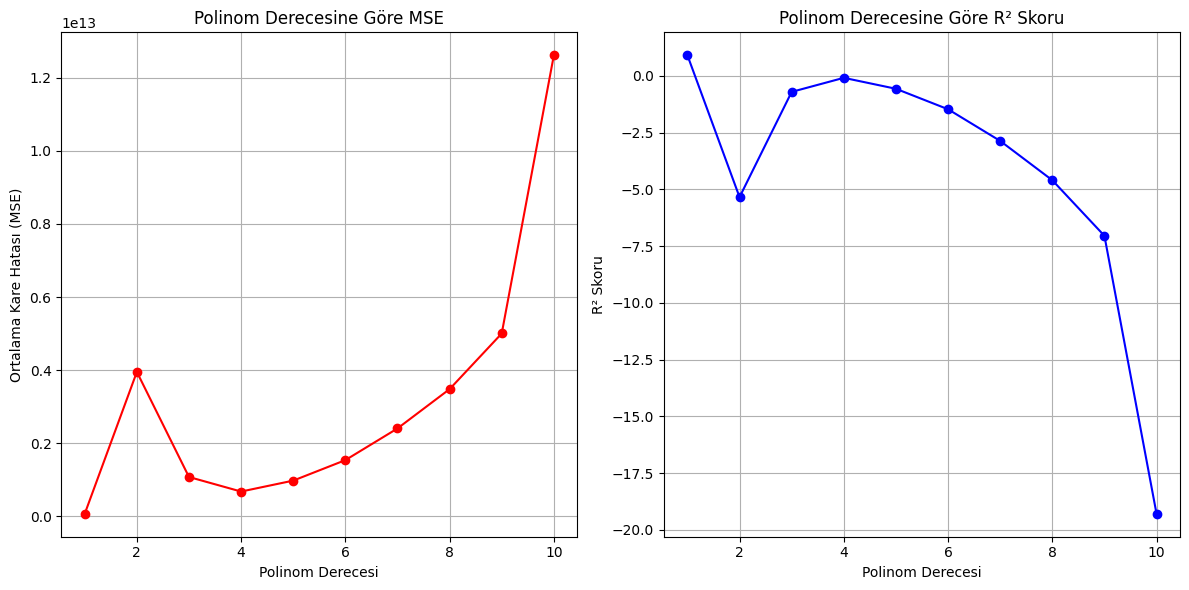

En iyi polinom derecesi: 1
En iyi MSE: 65676346795.486084
En iyi R² skoru: 0.9112351198869044


In [230]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
import numpy as np 

degrees = np.arange(1, 11)
scores_mse = []
scores_r2 = []

for deg in degrees:
    poly_reg = PolynomialFeatures(degree=deg)
    X_poly = poly_reg.fit_transform(X)  

    model = LinearRegression()

    mse_scores = cross_val_score(model, X_poly, y, scoring='neg_mean_squared_error', cv=5)
    r2_scores = cross_val_score(model, X_poly, y, scoring='r2', cv=5)

    mean_mse = -mse_scores.mean() 
    mean_r2 = r2_scores.mean()    

    scores_mse.append(mean_mse)
    scores_r2.append(mean_r2)

best_degree = degrees[np.argmin(scores_mse)]
best_mse = scores_mse[np.argmin(scores_mse)]
best_r2 = scores_r2[np.argmin(scores_mse)]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(degrees, scores_mse, marker='o', color='red')
plt.xlabel("Polinom Derecesi")
plt.ylabel("Ortalama Kare Hatası (MSE)")
plt.title("Polinom Derecesine Göre MSE")
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(degrees, scores_r2, marker='o', color='blue')
plt.xlabel("Polinom Derecesi")
plt.ylabel("R² Skoru")
plt.title("Polinom Derecesine Göre R² Skoru")
plt.grid()

plt.tight_layout()
plt.show()

print("En iyi polinom derecesi:", best_degree)
print("En iyi MSE:", best_mse)
print("En iyi R² skoru:", best_r2)